
Python was not able to load the fast fortran material routines.


*************************************************************
Loading gmsh-mesh from H:\TUM-PC\Dokumente\Projects\AMfe\meshes/test_meshes/3_partition_2d_blade_quad_mesh.msh
Mesh H:\TUM-PC\Dokumente\Projects\AMfe\meshes/test_meshes/3_partition_2d_blade_quad_mesh.msh successfully imported. 
Assign a material to a physical group.
*************************************************************


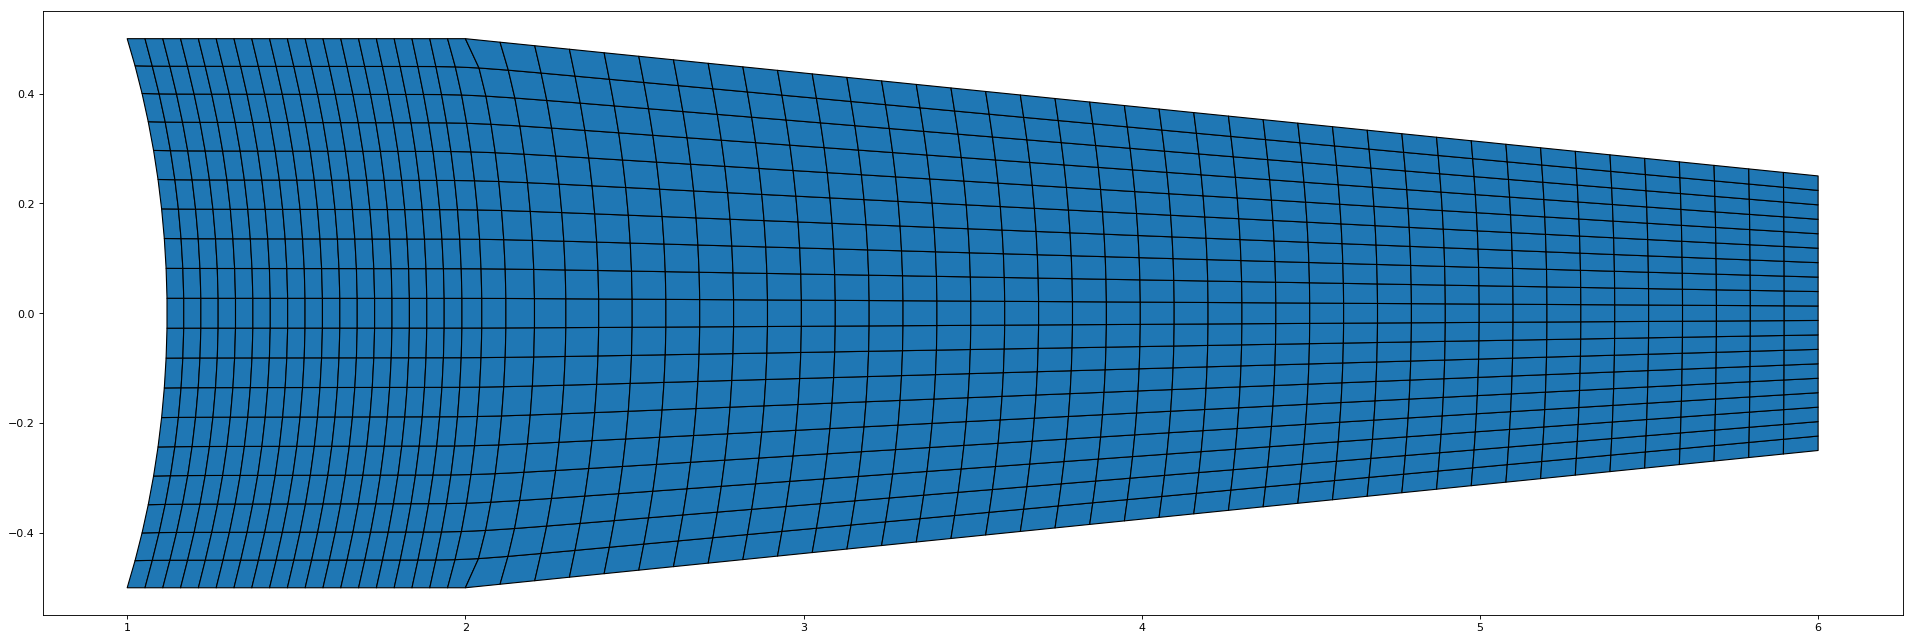

No handles with labels found to put in legend.
No handles with labels found to put in legend.


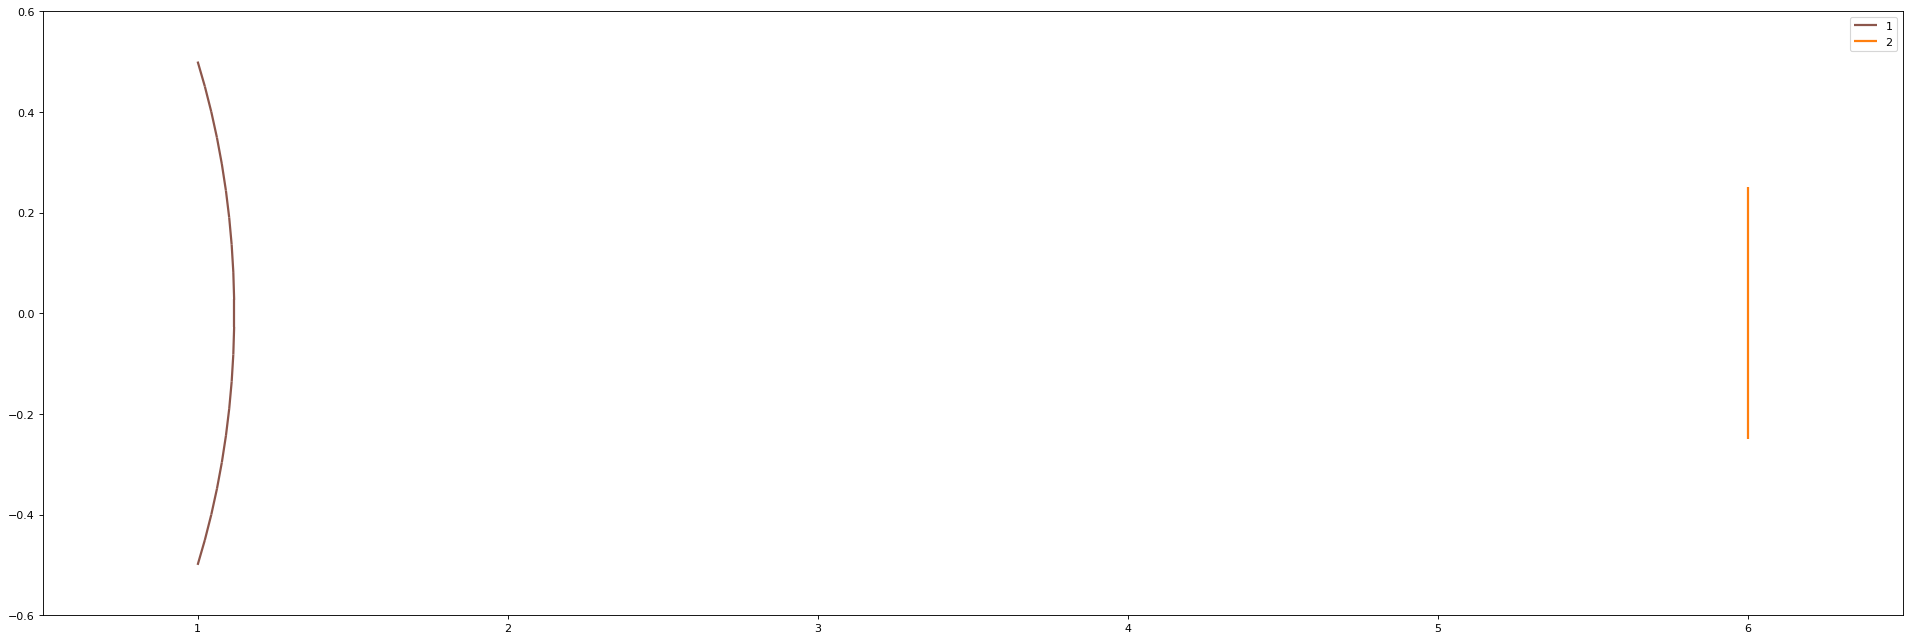

In [1]:
import sys 
import amfe
import matplotlib.pyplot as plt
import numpy as np
import scipy
import copy
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

msh_dict = {}
msh_dict[1] = amfe.amfe_dir('meshes/test_meshes/3_partition_2d_blade_quad_mesh.msh')
msh_dict[2] = amfe.amfe_dir('meshes/test_meshes/geo_hole_quad_part_4.msh')

domain_id = {}
domain_id[1] = 3
domain_id[2] = 8

# select mesh to be plotted
mesh_id = 1
mshfile = msh_dict[mesh_id]

m = amfe.Mesh()
m.import_msh(mshfile)

# creating material
my_material = amfe.KirchhoffMaterial(E=210E9, nu=0.3, rho=7.86E3, plane_stress=True, thickness=0.1)


m.split_in_groups()


# plotting mesh
fig, ax1=plt.subplots(1,figsize=(30, 10), dpi= 80, facecolor='w', edgecolor='k')
amfe.plot_submesh(m.groups[domain_id[mesh_id]],ax1)
plt.show()


# plotting boundary elements

fig, ax1=plt.subplots(1,figsize=(30, 10), dpi= 80, facecolor='w', edgecolor='k')
amfe.plot_boundary_1d(m,ax1)
plt.show()

In [2]:
sys.path.append(r"H:\TUM-PC\Dokumente\Projects\FETI")
from cyclic_domain_test import *

In [3]:
# plotting mesh
#alpha = 10

def plot_rot(alpha=0):
    fig, ax1=plt.subplots(1,figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
    new = rot_z(m.nodes,alpha,ref_point_vector=[0.0,0.0,0.0])
    submesh = m.groups[domain_id[mesh_id]]
    submesh.parent_mesh.nodes = new
    amfe.plot_submesh(submesh,ax1)
    plt.xlim([-7,7])
    plt.ylim([-7,7])
    plt.show()
    
interact(plot_rot,alpha=(0,180,5))    

A Jupyter Widget

<function __main__.plot_rot>

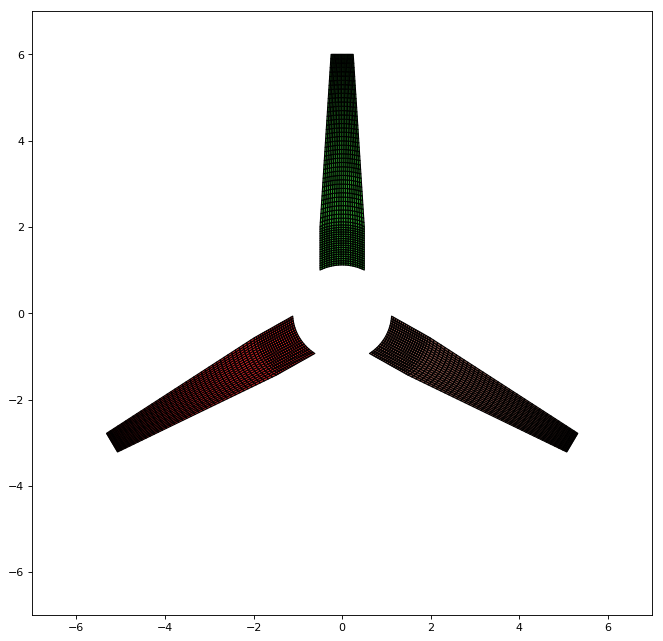

In [4]:
# plotting mesh
#alpha = 10

alpha = [90,210,330]
submesh_dict = {}

for key,alpha_i in enumerate(alpha):
    new = rot_z(m.nodes,alpha_i)
    submesh = copy.deepcopy(m.groups[domain_id[mesh_id]])
    submesh.parent_mesh.nodes = new
    submesh = m.groups[domain_id[mesh_id]]
    submesh.parent_mesh.nodes = new
    submesh_dict[key] = copy.deepcopy(submesh)



fig, ax1=plt.subplots(1,figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
ax1 = amfe.plot_submesh(submesh_dict[0],ax1)
ax1 = amfe.plot_submesh(submesh_dict[1],ax1)
ax1 = amfe.plot_submesh(submesh_dict[2],ax1)
plt.xlim([-7,7])
plt.ylim([-7,7])
plt.show()
    

In [5]:
# solbinf a static problem

# creating material
my_material = amfe.KirchhoffMaterial(E=210E9, nu=0.3, rho=7.86E3, plane_stress=True, thickness=1)

# setting boundary condition
# selecting subdomain for boundary condition
sub_dir = m.get_submesh('physical',1)
sub_neu = m.get_submesh('physical',2)

value = 5.0E9
neu = amfe.boundary.Boundary(sub_neu,value,'normal')
diri = amfe.boundary.Boundary(sub_dir,0,'xy','dirichlet')


# setting main domain for FE calculation
domain = m.set_domain('phys_group', domain_id[mesh_id])
domain.set_material(my_material)
domain.append_bondary_condition(neu)
domain.append_bondary_condition(diri)


scale = 1
my_system = amfe.MechanicalSystem()
my_system.set_mesh_obj(m)
my_system.set_domain(domain_id[mesh_id],my_material)
my_system.apply_dirichlet_boundaries(1, 'xy')
my_system.apply_neumann_boundaries(2, value, [1.0,-0.1])

s = amfe.LinearStaticsSolver(my_system)
s.solve()

u_fea = my_system.u_output[1]
connectivity = my_system.mesh_class.connectivity
nodes = my_system.mesh_class.nodes



WARNING. Please provide a elem_group_series for split mesh in grops.
WARNING. Please provide a elem_group_series for split mesh in grops.

 phys_group 3 with 1102 elements successfully added.
Total number of elements in mesh: 1102
*************************************************************
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 1102 elements and 2360 dofs.
Time taken for preallocation: 0.04 seconds.

 phys_group 1 with 20 nodes successfully added to Dirichlet Boundaries.
Total number of nodes with Dirichlet BCs: 20
Total number of constrained dofs: 40
*************************************************************

 phys_group 2 with 19 elements successfully added to Neumann Boundary.
Total number of neumann elements in mesh: 19
Total number of elements in mesh: 1102
*************************************************************
Attention: No linear solver was given, setting linear_solver = PardisoSolver.
Attention: No pseudo time evaluation was give

C:\Users\ge72tih\AppData\Local\Continuum\anaconda3\envs\py36\Lib\site-packages\scipy\sparse\sputils.py:114: UserWarning: object dtype is not supported by sparse matrices
  warnings.warn("object dtype is not supported by sparse matrices")


Start solving linear static problem...
Static problem solved.


In [6]:
def plot_static(scale=0):
    fig, ax1=plt.subplots(1,figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
    amfe.plotDeformQuadMesh(connectivity,nodes,my_system.u_output[1],scale,ax1) 
    plt.show()
    
interact(plot_static,mode=(0,10,1),scale=(0,10,1))

A Jupyter Widget

<function __main__.plot_static>

In [7]:
scale = 1

direct_list = [np.array([1.0, 0.50]),
               np.array([1.0, -0.50]),
               np.array([0.0, 0.00])]

system_dict = {}                        
m1 = copy.deepcopy(m)
my_system1 = amfe.MechanicalSystem()
my_system1.set_mesh_obj(m1)
my_system1.set_domain(domain_id[mesh_id],my_material)
my_system1.apply_dirichlet_boundaries(1, 'xy')
my_system1.apply_neumann_boundaries(2, value, direct=direct_list[0])
s1 = amfe.LinearStaticsSolver(my_system1)
s1.solve()
system_dict[0] = copy.deepcopy(my_system1)


 phys_group 3 with 1102 elements successfully added.
Total number of elements in mesh: 2204
*************************************************************
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 2204 elements and 2360 dofs.
Time taken for preallocation: 0.08 seconds.

 phys_group 1 with 20 nodes successfully added to Dirichlet Boundaries.
Total number of nodes with Dirichlet BCs: 20
Total number of constrained dofs: 40
*************************************************************

 phys_group 2 with 19 elements successfully added to Neumann Boundary.
Total number of neumann elements in mesh: 38
Total number of elements in mesh: 2204
*************************************************************
Attention: No linear solver was given, setting linear_solver = PardisoSolver.
Attention: No pseudo time evaluation was given, setting t = 1.0.
Assembling external force and stiffness...


C:\Users\ge72tih\AppData\Local\Continuum\anaconda3\envs\py36\Lib\site-packages\scipy\sparse\sputils.py:114: UserWarning: object dtype is not supported by sparse matrices
  warnings.warn("object dtype is not supported by sparse matrices")


Start solving linear static problem...
Static problem solved.


In [8]:
m2 = copy.deepcopy(m)
my_system2 = amfe.MechanicalSystem()
my_system2.set_mesh_obj(m2)
my_system2.set_domain(domain_id[mesh_id],my_material)
my_system2.apply_dirichlet_boundaries(1, 'xy')
my_system2.apply_neumann_boundaries(2, value, direct=direct_list[1])
s2 = amfe.LinearStaticsSolver(my_system2)
s2.solve()
system_dict[1] = copy.deepcopy(my_system2)


 phys_group 3 with 1102 elements successfully added.
Total number of elements in mesh: 2204
*************************************************************
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 2204 elements and 2360 dofs.
Time taken for preallocation: 0.03 seconds.

 phys_group 1 with 20 nodes successfully added to Dirichlet Boundaries.
Total number of nodes with Dirichlet BCs: 20
Total number of constrained dofs: 40
*************************************************************

 phys_group 2 with 19 elements successfully added to Neumann Boundary.
Total number of neumann elements in mesh: 38
Total number of elements in mesh: 2204
*************************************************************
Attention: No linear solver was given, setting linear_solver = PardisoSolver.
Attention: No pseudo time evaluation was given, setting t = 1.0.
Assembling external force and stiffness...


C:\Users\ge72tih\AppData\Local\Continuum\anaconda3\envs\py36\Lib\site-packages\scipy\sparse\sputils.py:114: UserWarning: object dtype is not supported by sparse matrices
  warnings.warn("object dtype is not supported by sparse matrices")


Start solving linear static problem...
Static problem solved.


In [9]:
m3 = copy.deepcopy(m)
my_system3 = amfe.MechanicalSystem()
my_system3.set_mesh_obj(m3)
my_system3.set_domain(domain_id[mesh_id],my_material)
my_system3.apply_dirichlet_boundaries(1, 'xy')
my_system3.apply_neumann_boundaries(2, 0.0, 'normal')
s3 = amfe.LinearStaticsSolver(my_system3)
s3.solve()    
    

system_dict[2] = copy.deepcopy(my_system3)


 phys_group 3 with 1102 elements successfully added.
Total number of elements in mesh: 2204
*************************************************************
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 2204 elements and 2360 dofs.
Time taken for preallocation: 0.03 seconds.

 phys_group 1 with 20 nodes successfully added to Dirichlet Boundaries.
Total number of nodes with Dirichlet BCs: 20
Total number of constrained dofs: 40
*************************************************************

 phys_group 2 with 19 elements successfully added to Neumann Boundary.
Total number of neumann elements in mesh: 38
Total number of elements in mesh: 2204
*************************************************************
Attention: No linear solver was given, setting linear_solver = PardisoSolver.
Attention: No pseudo time evaluation was given, setting t = 1.0.
Assembling external force and stiffness...


C:\Users\ge72tih\AppData\Local\Continuum\anaconda3\envs\py36\Lib\site-packages\scipy\sparse\sputils.py:114: UserWarning: object dtype is not supported by sparse matrices
  warnings.warn("object dtype is not supported by sparse matrices")


Start solving linear static problem...
Static problem solved.


In [10]:
def plot_static(scale=0):
    
    for key in [0,1,2]:
        my_system = system_dict[key]
        u_fea = my_system.u_output[1]
        connectivity = my_system.mesh_class.connectivity
        nodes = my_system.mesh_class.nodes
        amfe.plotDeformQuadMesh(connectivity,nodes,u_fea ,scale) 
        #plt.figure()
        #plt.plot(u_fea)
        
    plt.show()
    
interact(plot_static,scale=(0,10,1))

A Jupyter Widget

<function __main__.plot_static>

In [11]:
# plotting mesh
#alpha = 10

alpha = [90,210,330]

def plot_cyclic(scale=0):
    
    fig, ax1=plt.subplots(1,figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
    for key,alpha_i in enumerate(alpha):

        my_system = system_dict[key]
        u_fea = my_system.u_output[1]

        connectivity = my_system.mesh_class.connectivity
        nodes = my_system.mesh_class.nodes
        new_nodes = rot_z(nodes,alpha_i)
        id_matrix = my_system.assembly_class.id_matrix
        u_new = rot_dofs_z(u_fea,id_matrix,alpha_i)

        amfe.plotDeformQuadMesh(connectivity,new_nodes,u_new ,scale,ax1) 
    
    plt.show()

interact(plot_cyclic,scale=(0,10,1))


A Jupyter Widget

<function __main__.plot_cyclic>

In [12]:
plot_cyclic(1)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
# plotting mesh
#alpha = 10

alpha = [90,210,330]
submesh_dict = {}

for key,alpha_i in enumerate(alpha):
    new = rot_z(m.nodes,alpha_i)
    submesh = copy.deepcopy(m.groups[domain_id[mesh_id]])
    submesh.parent_mesh.nodes = new
    submesh = m.groups[domain_id[mesh_id]]
    submesh.parent_mesh.nodes = new
    submesh_dict[key] = copy.deepcopy(submesh)


sub1= submesh_dict[0]
sub2= submesh_dict[1]
sub1= submesh_dict[2]
    
fig, ax1=plt.subplots(1,figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
ax1 = amfe.plot_submesh(submesh_dict[0],ax1)
ax1 = amfe.plot_submesh(submesh_dict[1],ax1)
ax1 = amfe.plot_submesh(submesh_dict[2],ax1)
plt.xlim([-7,7])
plt.ylim([-7,7])
plt.show()

In [ ]:
d1 = m1.set_domain('phys_group',3)
d1.split_in_partitions()

In [ ]:
sub1.groups